In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list -s License

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download andrewmvd/car-plate-detection  --unzip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pathlib

In [ ]:
def get_image_histogram_grayscale(image):
    # get image size 
    height, width = image.shape
    
    # Create the vector n that will contain pixel value frequencies
    # The vector lenght must be equal to the number of pixel intensities, e.g. for 
    # grayscale 256 possible values (0..255)
    # The vector type must be floating point 
    
    # Calculate the number of possible pixel values
    # Task what do "numpy.dtype" and "numpy.dtype.itemsize" represent?
    # What about "math.pow()"?  
  
    pixel_values_number = int(np.power(2,8*image.dtype.itemsize))
    #What is 'pixel_values_number' and how can you use it to generalize this function?
    #print('pixel_values_number ', pixel_values_number)
    histogram = np.zeros(pixel_values_number, dtype=np.float)
    
    for i in range(0, height):
        for j in range(0, width):
            histogram[image[i][j]]=histogram[image[i][j]]+1.0
          
    histogram = histogram/ float(width*height)
           
    return histogram

def cumulative_from_histogram_grayscale(histogram):
    cumulative=np.zeros(len(histogram), dtype=np.float)
    cumulative[0]=histogram[0]
    for i in range(1, len(histogram)):
        cumulative[i] = cumulative[i-1] + histogram[i]
    return cumulative

def otsu_image_thresholding(image):
    
    hist=get_image_histogram_grayscale(image)
    cumulative = cumulative_from_histogram_grayscale(hist)
    sigma_2_T = np.zeros(hist.shape, dtype=np.float)
    
    len_sigma_2_T=sigma_2_T.shape[0]
   
    for T in range(len_sigma_2_T):
        w_b = cumulative[T]
        w_f =1.0-w_b
        
        if(w_b !=0):
            mu_b = sum([i*hist[i] for i in range(T)])/w_b
        else:
            mu_b = 0.0

        if(w_f !=0):
            mu_f = sum([i*hist[i] for i in range(T,len_sigma_2_T)])/w_f
        else:
            mu_f = 0.0

        if(w_b !=0):
            sigma_2_b = sum([((i-mu_b)**2)*hist[i] for i in range(T)])/w_b
        else:
            sigma_2_b = 0.0

        if(w_f !=0):
            sigma_2_f = sum([((i-mu_f)**2)*hist[i] for i in range(T,len_sigma_2_T)])/w_f
        else:
            sigma_2_f = 0.0

        sigma_2_T[T]=w_b*sigma_2_b+w_f*sigma_2_f

  
    otsu_threshold=np.int(np.where(sigma_2_T==np.min(sigma_2_T))[0])

    print(otsu_threshold)
    th_image=np.zeros(image.shape, dtype=np.uint8)
    th_image[image > otsu_threshold] = 255
    
    return otsu_threshold, sigma_2_T, th_image

In [ ]:
def image_read(image1, image2, title1 = "", title2 = ""):
    fig = plt.figure(figsize = (15, 15))
    ax1 = fig.add_subplot(121)
    ax1.imshow(image1, cmap = "gray")
    ax1.set(xticks = [], yticks = [], title = title1)
    ax2 = fig.add_subplot(122)
    ax2.imshow(image2, cmap = "gray")
    ax2.set(xticks = [], yticks = [], title = title2)

In [ ]:
path = "/Cars120.png"

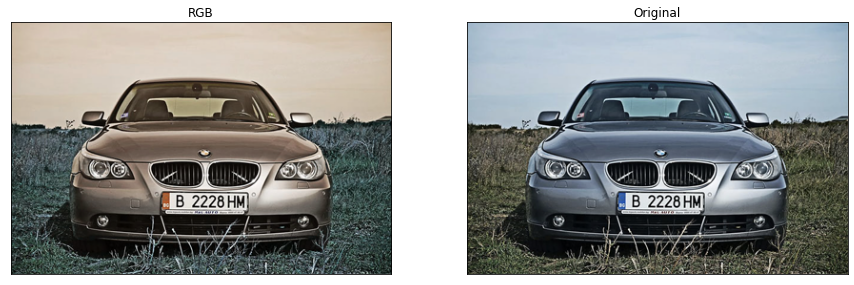

In [ ]:
image = cv2.imread(path)
rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plot_image = image_read(image, rgb, title1 = "RGB", title2 = "Original")

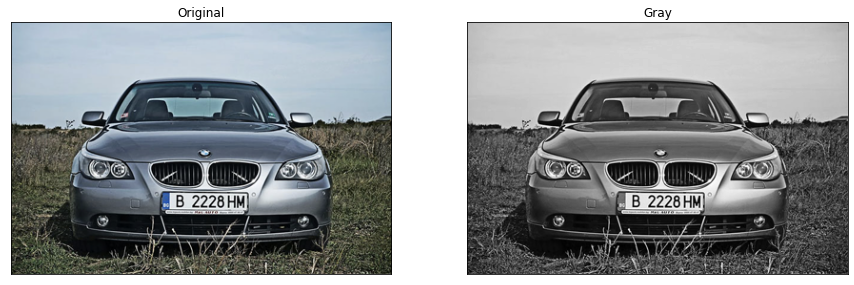

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image_read(rgb, gray, title1 = "Original", title2 = "Gray")

Gaussian Blur

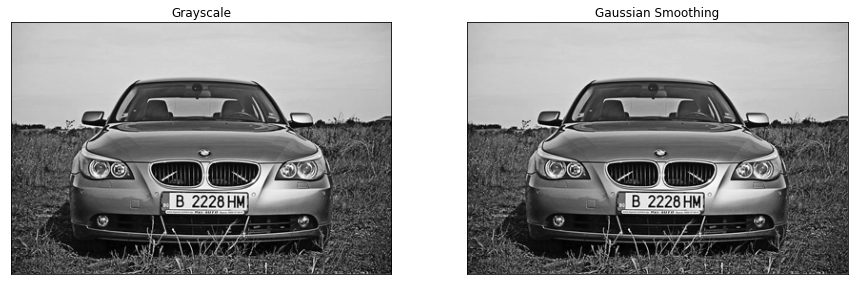

In [ ]:
#kernel gaussian disesuaikan nilainya
#makin besar nilainya makin blur
smooth = cv2.GaussianBlur(gray,(1,1),cv2.BORDER_DEFAULT)
image_read(gray, smooth, title1 = "Grayscale", title2 = "Gaussian Smoothing")

Segmentasi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: `np.float` is a deprecated alias for 

130
Otsu Image otsu_threshold:  130


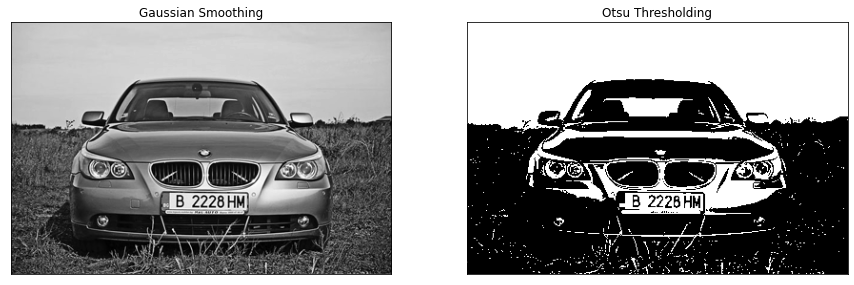

In [ ]:
otsu_threshold, sigma_2_T, th_image = otsu_image_thresholding(smooth)
print("Otsu Image otsu_threshold: ", otsu_threshold)
image_read(smooth, th_image, title1 = "Gaussian Smoothing", title2 = "Otsu Thresholding")

In [ ]:
#nilai kernel disesuaikan
kernel = np.ones((5, 5), np.uint8)

erosion = cv2.erode(th_image, kernel,iterations=1)
dilation = cv2.dilate(th_image, kernel, iterations=1)

closing = cv2.morphologyEx(th_image, cv2.MORPH_CLOSE, kernel, iterations=1)
opening = cv2.morphologyEx(th_image, cv2.MORPH_OPEN, kernel, iterations=1)

image_read(erosion, dilation, title1 = "Erosion", title2 = "Dilation")
image_read(opening, closing, title1 = "Opening", title2 = "Closing")

NameError: ignored

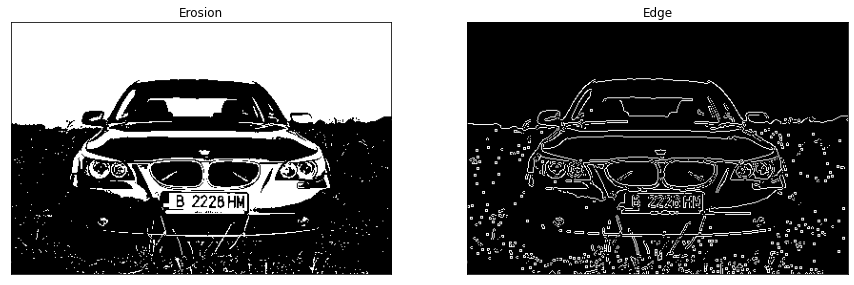

In [ ]:
edge = cv2.Canny(erosion, 70, 400)
image_read(erosion, edge, title1 = "Erosion", title2 = "Edge")

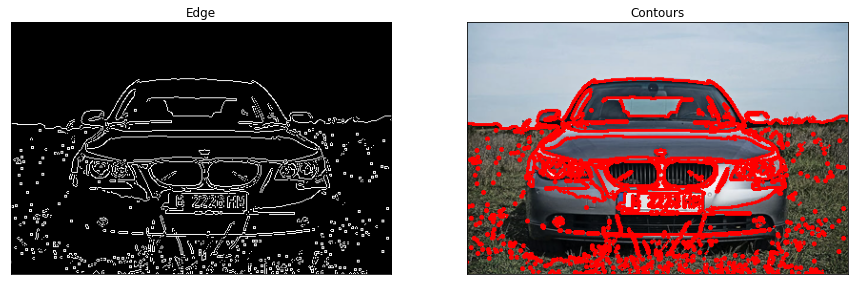

In [ ]:
contours, new = cv2.findContours(edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

image_copy = rgb.copy()

_ = cv2.drawContours(image_copy, contours, -1, (255, 0, 0), 2)

image_read(edge, image_copy, title1 = "Edge", title2 = "Contours")

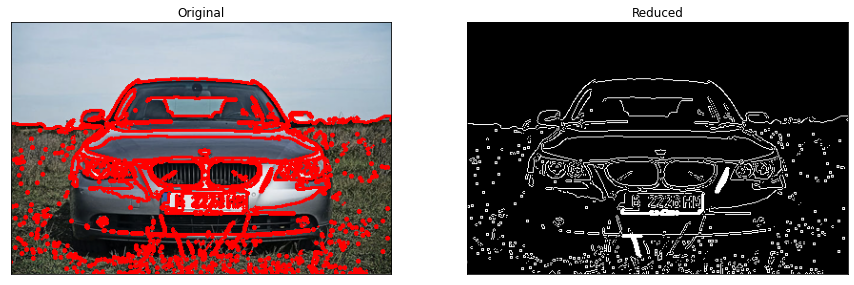

In [ ]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:4]

image_reduced = edge.copy()
_ = cv2.drawContours(image_reduced, contours, -1, (255, 0, 0), 2)

image_read(image_copy, image_reduced, title1 = "Original", title2 = "Reduced")

In [ ]:
plate = None

for i in contours:
    a = cv2.arcLength(i, True)
    edge_count = cv2.approxPolyDP(i, 0.005 * a, True)
    print('edge_count: ', edge_count)
    #jumlah tepi ideal untuk segiempat = 4
    #makin kecil nilainya makin bagus
    if len(edge_count) >= 4 and len(edge_count) < 50:
        x, y, w, h = cv2.boundingRect(i)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

edge_count:  [[[274 154]]

 [[273 154]]

 [[272 155]]

 [[272 156]]

 [[271 157]]

 [[271 158]]

 [[270 159]]

 [[270 160]]

 [[269 161]]

 [[269 162]]

 [[268 163]]

 [[268 164]]

 [[267 165]]

 [[267 166]]

 [[266 167]]

 [[266 168]]

 [[265 169]]

 [[265 170]]

 [[264 171]]

 [[264 172]]

 [[262 175]]

 [[262 177]]

 [[261 178]]

 [[261 179]]

 [[261 178]]

 [[262 177]]

 [[263 178]]

 [[263 179]]

 [[263 178]]

 [[264 177]]

 [[265 174]]

 [[268 171]]

 [[268 170]]

 [[270 168]]

 [[270 167]]

 [[271 166]]

 [[271 164]]

 [[272 163]]

 [[272 161]]

 [[273 160]]

 [[273 158]]

 [[272 157]]

 [[272 155]]

 [[273 154]]]


True

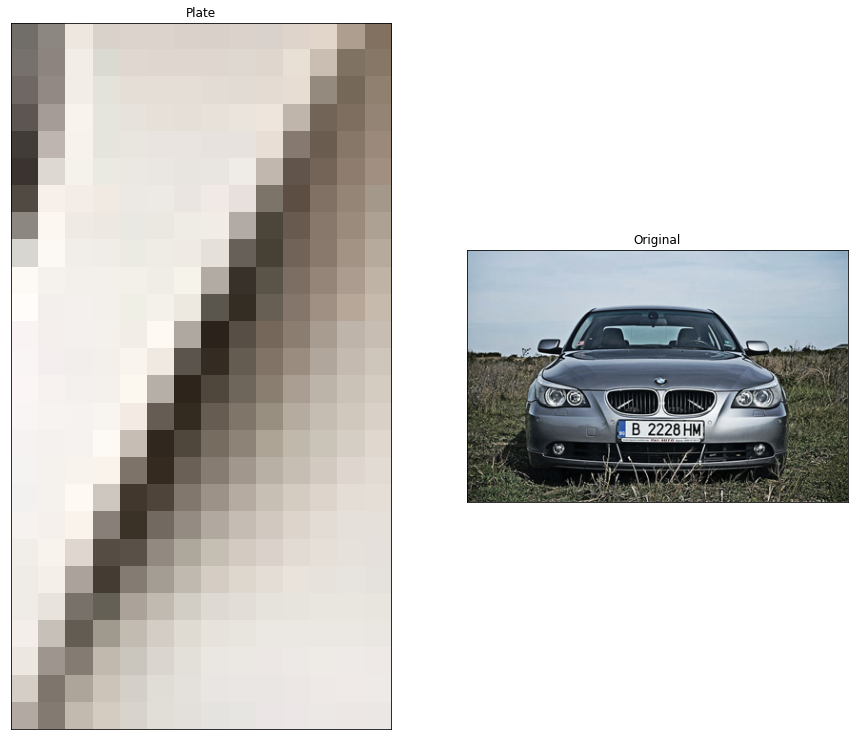

In [ ]:
image_read(plate, rgb, title1 = "Plate", title2 = "Original")